In [478]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from matplotlib import pyplot as plt
import csv

# Data Cleaning
df = pd.read_csv("netflix.csv")
pd.set_option('display.max_rows', 8790) # To show all 8790 rows

# Replacing not given as NaN
df.replace('Not Given', np.nan, inplace = True)

# # We want to make the column 'show_id' the primary index column. In addition, we are converting the type of show_id from a string to an integer.
df['show_id'] = df['show_id'].str.replace('s', '').astype(int)
df.sort_values(by = 'show_id', ascending = True, inplace = True)
df.set_index('show_id', inplace = True)

# We want to ensure that the data_added column is set to DD/MM/YYYY format
df['date_added'] = df['date_added'].apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

movie = df[df['type'] == 'Movie'].copy()
tv_show = df[df['type'] == 'TV Show'].copy()
df.head()

/var/folders/k1/5kxglv4d4pl7k44ds8wvdg0m0000gn/T/ipykernel_34456/2486435172.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['year_added'] = pd.to_datetime(df['date_added']).dt.year


,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
show_id,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25/09/2021,2020,PG-13,90 min,Documentaries,2021
2,TV Show,Blood & Water,NaN,South Africa,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021
3,TV Show,Ganglands,Julien Leclercq,France,24/09/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
4,TV Show,Jailbirds New Orleans,NaN,Pakistan,24/09/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021
5,TV Show,Kota Factory,NaN,India,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021


The mean movie time is 99.58488410055502
The highest number of movies, 2395, was added into Netflix from United States.
The 7th highest number of movies, 109, was added into Netflix from Egypt.


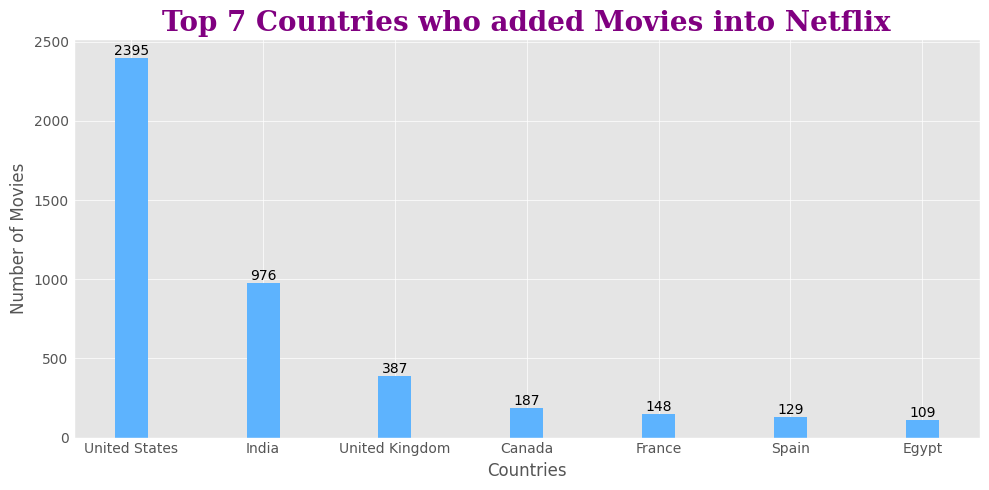

,movie_count,movie_proportion
country,,
United States,2395,0.408076
India,976,0.166297
United Kingdom,387,0.065940
Canada,187,0.031862
France,148,0.025217
Spain,129,0.021980
Egypt,109,0.018572


In [479]:
# Data Analysis and Visualisation

# Finding the top 7 countries of the movies added into netflix
movie_per_country = pd.DataFrame(movie['country'].value_counts()).rename(columns = {"count" : "movie_count"})
movie_per_country[['movie_proportion']] = pd.DataFrame(movie['country'].value_counts(normalize = True))
top_7_countries = movie_per_country.head(7)

# Replace missing values in 'duration' column with zeros
movie['duration'] = movie['duration'].fillna(0)

# Finding an average duration of a movie in minutes
movie['duration'] = movie['duration'].str.replace(' min', '')
movie['duration'] = movie['duration'].astype(int)

mean_movie_time = movie['duration'].mean()
print("The mean movie time is " + str(mean_movie_time))


# Plotting a bar graph to find the top 7 countries who added movies into Netflix
plt.style.use('ggplot')
x_indexes = np.arange(len(top_7_countries.index))
width = 0.25
font = {'family': 'serif', 'color': 'purple', 'weight': 'heavy'}


plt.figure(figsize=(10, 5))
bar_graph = plt.bar(top_7_countries.index, top_7_countries['movie_count'], width = width, color = '#5DB3FE', label = 'All Devs')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.title('Top 7 Countries who added Movies into Netflix', fontsize = 20, fontdict = font)

# Adding labels on top of each bar
for bar in bar_graph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha = 'center', va = 'bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig('bargraph_top_7_countries_who_added_movies_into_netflix.png')
plt.show()

print("The highest number of movies, " + str(top_7_countries['movie_count'].max()) + ", was added into Netflix from " 
      + str(top_7_countries['movie_count'].idxmax()) + ".")
print("The 7th highest number of movies, " + str(top_7_countries['movie_count'].min()) + ", was added into Netflix from " 
      + str(top_7_countries['movie_count'].idxmin()) + ".")



top_7_countries

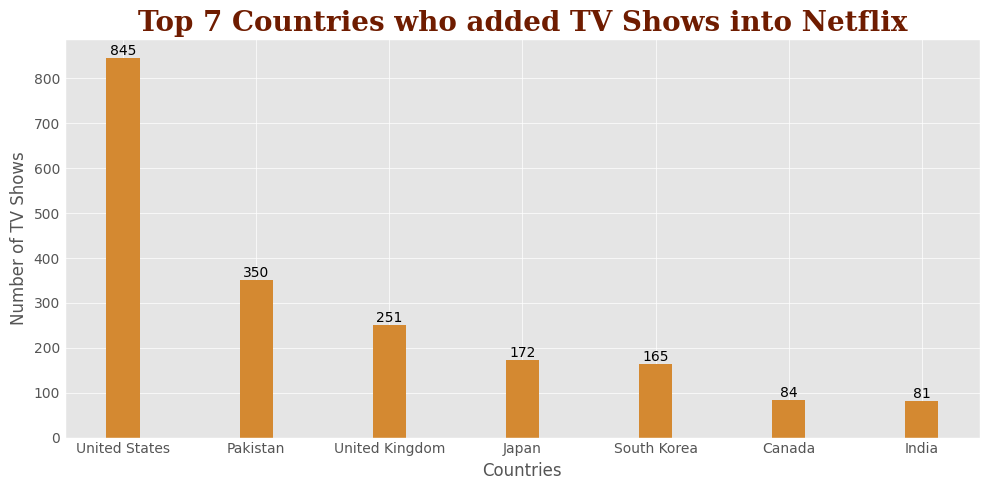

The highest number of TV shows, 845, was added into Netflix from United States.
The 7th highest number of TV shows, 81, was added into Netflix from India.


,tv_show_count,tv_show_proportion
country,,
United States,845,0.320805
Pakistan,350,0.132878
United Kingdom,251,0.095292
Japan,172,0.065300
South Korea,165,0.062642
Canada,84,0.031891
India,81,0.030752


In [480]:
# Data Analysis and Visualisation

# Finding the top 7 countries of the TV Shows added into netflix
tv_show = df[df['type'] == 'TV Show'].copy()
tv_show_per_country = pd.DataFrame(tv_show['country'].value_counts()).rename(columns = {"count" : "tv_show_count"})
tv_show_per_country[['tv_show_proportion']] = pd.DataFrame(tv_show['country'].value_counts(normalize = True))
top_7_countries_who_made_tv_shows = tv_show_per_country.head(7)

# Plotting a bar graph to find the top 7 countries who added TV Shows into Netflix
plt.style.use('ggplot')
x_indexes = np.arange(len(top_7_countries_who_made_tv_shows.index))
width = 0.25
font = {'family': 'serif', 'color': '#6F1C00', 'weight': 'heavy'}


plt.figure(figsize=(10, 5))
bar_graph = plt.bar(top_7_countries_who_made_tv_shows.index, top_7_countries_who_made_tv_shows['tv_show_count'], width = width, color = '#D48931')
plt.xlabel('Countries')
plt.ylabel('Number of TV Shows')
plt.title('Top 7 Countries who added TV Shows into Netflix', fontsize = 20, fontdict = font)

# Adding labels on top of each bar
for bar in bar_graph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha = 'center', va = 'bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig('bargraph_top_7_countries_who_added_tv_show_into_netflix.png')
plt.show()

print("The highest number of TV shows, " + str(top_7_countries_who_made_tv_shows['tv_show_count'].max()) + ", was added into Netflix from " 
      + str(top_7_countries_who_made_tv_shows['tv_show_count'].idxmax()) + ".")
print("The 7th highest number of TV shows, " + str(top_7_countries_who_made_tv_shows['tv_show_count'].min()) + ", was added into Netflix from " 
      + str(top_7_countries_who_made_tv_shows['tv_show_count'].idxmin()) + ".")

top_7_countries_who_made_tv_shows

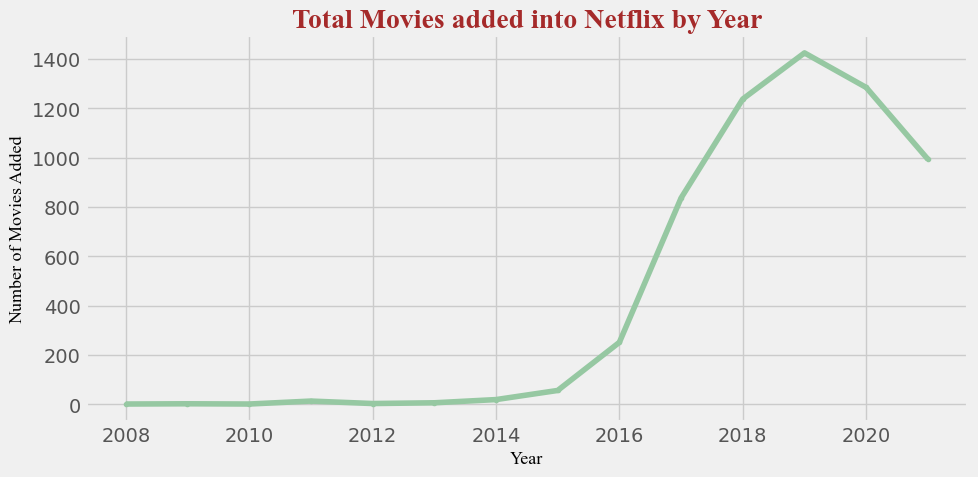

The highest number of movies, 1424, was added in 2019
The least number of movies, 1, was added in 2008


In [470]:
# Data Analysis and Visualisation

# Total Movies added per year
movie_added = pd.DataFrame(movie['year_added'].value_counts()).sort_values(by = "year_added")

# Plotting a line graph to find the total number of movies added into Netflix by Year.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.plot(movie_added.index, movie_added['count'], color = '#96C8A2', linestyle = '-', marker = '.', label = 'Movies added')

font_title = {'family': 'Times New Roman', 'color': 'brown', 'weight': 'heavy'}
font_axis = {'family': 'Times New Roman', 'color': 'black', 'weight': 'normal'}

plt.xlabel('Year', fontsize = 13, fontdict = font_axis)
plt.ylabel('Number of Movies Added', fontsize = 13, fontdict = font_axis)
plt.title('Total Movies added into Netflix by Year', fontsize = 20, fontdict = font_title)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig('linegraph_total_movies_added_into_netflix_by_year.png')
plt.show()

print("The highest number of movies, " + str(movie_added['count'].max()) + ", was added in " + str(movie_added['count'].idxmax()))
print("The least number of movies, " + str(movie_added['count'].min()) + ", was added in " + str(movie_added['count'].idxmin()))


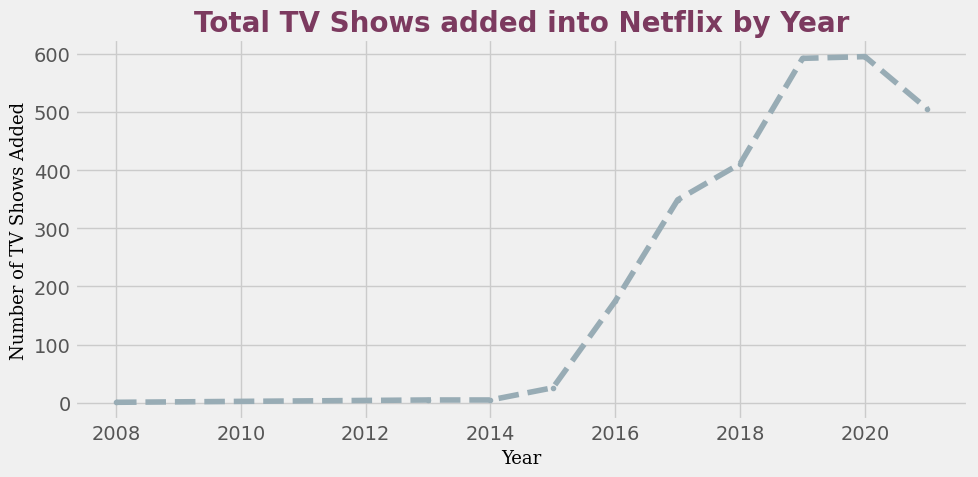

The highest number of TV Shows, 595, was added in 2020
The least number of TV Shows, 1, was added in 2008


In [481]:
# Data Analysis and Visualisation

# Total TV Shows added per year
tv_show_added = pd.DataFrame(tv_show['year_added'].value_counts()).sort_values(by = "year_added")

# Plotting a line graph to find the total number of TV Shows added into Netflix by Year.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.plot(tv_show_added.index, tv_show_added['count'], color = '#98ACB5', linestyle = '--', marker = '.', label = 'Movies added')

font_title = {'family': 'DejaVu Sans', 'color': '#7C3A5F', 'weight': 'heavy'}
font_axis = {'family': 'serif', 'color': 'black', 'weight': 'normal'}

plt.xlabel('Year', fontsize = 13, fontdict = font_axis)
plt.ylabel('Number of TV Shows Added', fontsize = 13, fontdict = font_axis)
plt.title('Total TV Shows added into Netflix by Year', fontsize = 20, fontdict = font_title)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.savefig('linegraph_total_tv_shows_added_into_netflix_by_year.png')
plt.show()

print("The highest number of TV Shows, " + str(tv_show_added['count'].max()) + ", was added in " + str(tv_show_added['count'].idxmax()))
print("The least number of TV Shows, " + str(tv_show_added['count'].min()) + ", was added in " + str(tv_show_added['count'].idxmin()))

                          count
Movies                     1222
Dramas                      679
Comedies                    616
Documentaries               457
Children & Family Movies    347
Independent Movies          331
Action & Adventure          323


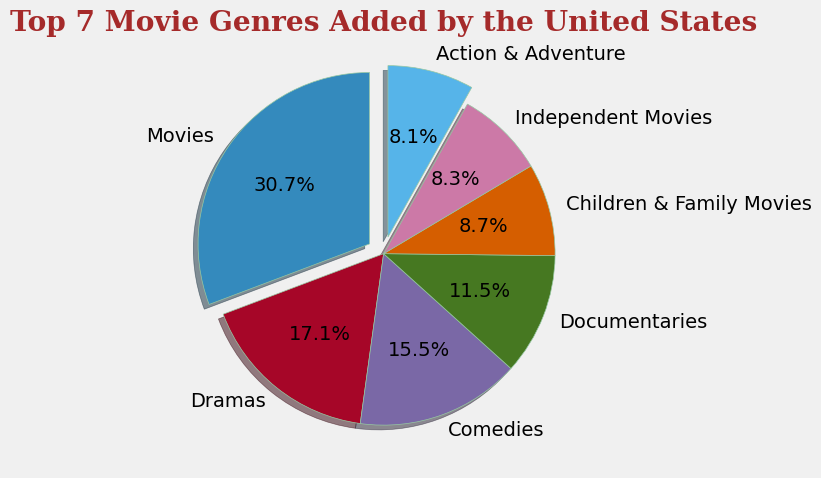

Movies, although generic, have the highest number of movies in this genre in the United States.
Action & Adventure have the 7th highest number of movies in this genre in the United States.


In [483]:
# Data Analysis and Visualisation

# Obtaining the total number of movies listed in each country
movie[['genre1', 'genre2', 'genre3']] = movie['listed_in'].str.split(', ', expand = True)
movie['genre1'].unique()

country_grp = movie.groupby(['country'])
genre_counts = {}
for genre in movie_genre_list:
    genre_counts[genre] = country_grp['listed_in'].apply(lambda x: x.str.contains(genre).sum())
movie_genre_per_country = pd.DataFrame(genre_counts)
movie_genre_per_country['Total Movies'] = movie_genre_per_country.sum(axis = 1)

for country in movie_genre_per_country.index:
    movie_genre_per_country.loc[country, 'Proportion in %'] = (movie_genre_per_country.loc[country,'Total Movies'] / movie_genre_per_country['Total Movies'].sum()) * 100

movie_genre_per_country[['Total Movies', 'Proportion in %']]

# movie genres in United States
usa_movie_genres = movie_genre_per_country.loc[['United States']].T.rename(columns = {'country' : 'Genre', 'United States' : "count"})
usa_movie_genres = usa_movie_genres.drop("Total Movies", axis = 0)
usa_movie_genres = pd.DataFrame(usa_movie_genres['count'].round().astype(int).sort_values(ascending = False).head(7))
print(usa_movie_genres)

# Plotting a pie chart to find the top 7 movie genres added into Netflix by the United States.
plt.style.use("bmh")
plt.figure(figsize=(10, 5))
slices = usa_movie_genres['count']
labels = usa_movie_genres.index
explode = [0.1, 0, 0, 0, 0, 0, 0.1]


plt.pie(slices, labels = labels, explode = explode, shadow = True,
        startangle = 90, #to rotate the pie chart for emphasis
        autopct = '%1.1f%%', #to include percentage
        wedgeprops = {'edgecolor' : '#96C8A2'})

font = {'family': 'serif', 'color': 'brown', 'weight': 'heavy'}

plt.title('Top 7 Movie Genres Added by the United States', fontdict = font)
plt.tight_layout() #to give default padding
plt.savefig('piechart_top_7_movie_genre_added_by_the_US.png')
plt.show()

print(str(usa_movie_genres['count'].idxmax()) + ", although generic, have the highest number of movies in this genre in the United States.")
print(str(usa_movie_genres['count'].idxmin()) + " have the 7th highest number of movies in this genre in the United States.")



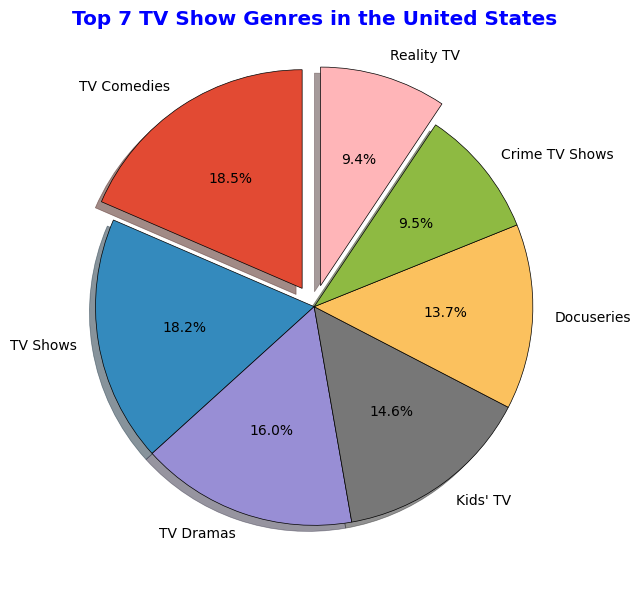

TV Comedies, have the highest number of TV Shows in this genre in the United States.
Reality TV have the 7th highest number of TV Shows in this genre in the United States.


In [484]:
# Data Analysis and Visualisation

# Obtaining a list of different TV show genres
tv_show[['genre1', 'genre2', 'genre3']] = tv_show['listed_in'].str.split(', ', expand = True)
tv_show['genre1'].unique()

genre_set = set()
for column in ['genre1', 'genre2', 'genre3']:
    for genre in tv_show[column].unique():
        if genre is not None:
            genre_set.add(genre)
tv_show_genre_list = list(genre_set)

# Obtaining the total number of TV Show listed in each country
country_grp = tv_show.groupby(['country'])
genre_counts = {}
for genre in tv_show_genre_list:
    genre_counts[genre] = country_grp['listed_in'].apply(lambda x: x.str.contains(genre).sum())
tv_show_genre_per_country = pd.DataFrame(genre_counts)
tv_show_genre_per_country['Total TV Shows'] = tv_show_genre_per_country.sum(axis = 1)
tv_show_genre_per_country


usa_tv_show_genres = tv_show_genre_per_country.loc[['United States']].T.rename(columns = {'country' : 'Genre', 'United States' : "count"})
usa_tv_show_genres = usa_tv_show_genres.drop("Total TV Shows", axis = 0)
usa_tv_show_genres = pd.DataFrame(usa_tv_show_genres['count'].round().astype(int).sort_values(ascending = False).head(7))

plt.style.use("ggplot")
plt.figure(figsize = (10, 6))
slices = usa_tv_show_genres['count']
labels = usa_tv_show_genres.index
explode = [0.1, 0, 0, 0, 0, 0, 0.1]

# Plotting a pie chart to find the top 7 TV Show genres added into Netflix by the United States.
plt.pie(slices, labels = labels, explode = explode, shadow = True,
        startangle = 90, #to rotate the pie chart for emphasis
        autopct = '%1.1f%%', #to include percentage
        wedgeprops = {'edgecolor' : 'black'})

font = {'family': 'sans', 'color': 'blue', 'weight': 'heavy'}

plt.title('Top 7 TV Show Genres in the United States', fontdict = font)
plt.tight_layout() #to give default padding
plt.savefig('piechart_top_7_tv_show_genre_added_by_the_US.png')
plt.show()

print(str(usa_tv_show_genres['count'].idxmax()) + ", have the highest number of TV Shows in this genre in the United States.")
print(str(usa_tv_show_genres['count'].idxmin()) + " have the 7th highest number of TV Shows in this genre in the United States.")

In [485]:
movie.to_csv('netflix_movie.csv')
tv_show.to_csv('netflix_tv_show.csv')